In [2]:
#read the packages
#read the data
#cat and numerical

**Import the required packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read the data**

In [2]:
visa_df=pd.read_csv('Visadataset.csv')
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


**Divide into categorical and Numerical columns**

In [4]:
cat_list=[]
num_list=[]
for i,j in dict(visa_df.dtypes).items():
    if j=='object':
        cat_list.append(i)
    else:
        num_list.append(i)
cat_list,num_list

(['case_id',
  'continent',
  'education_of_employee',
  'has_job_experience',
  'requires_job_training',
  'region_of_employment',
  'unit_of_wage',
  'full_time_position',
  'case_status'],
 ['no_of_employees', 'yr_of_estab', 'prevailing_wage'])

In [5]:
cat_columns=visa_df.select_dtypes(include='object').columns
num_columns=visa_df.select_dtypes(exclude='object').columns
print(cat_columns)
print(num_columns)

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')
Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')


**How to select a specific column**

In [7]:
visa_df['continent'] #series type

0          Asia
1          Asia
2          Asia
3          Asia
4        Africa
          ...  
25475      Asia
25476      Asia
25477      Asia
25478      Asia
25479      Asia
Name: continent, Length: 25480, dtype: object

In [8]:
visa_df[['continent']] #dataframe

,continent
0,Asia
1,Asia
2,Asia
3,Asia
4,Africa
...,...
25475,Asia
25476,Asia
25477,Asia
25478,Asia


In [9]:
visa_df.continent #series

0          Asia
1          Asia
2          Asia
3          Asia
4        Africa
          ...  
25475      Asia
25476      Asia
25477      Asia
25478      Asia
25479      Asia
Name: continent, Length: 25480, dtype: object

In [10]:
visa_df.loc[:,['continent']]

,continent
0,Asia
1,Asia
2,Asia
3,Asia
4,Africa
...,...
25475,Asia
25476,Asia
25477,Asia
25478,Asia


In [11]:
visa_df['continent'] #series type
visa_df[['continent']] #dataframe type
visa_df.continent #series
visa_df.loc[:,['continent']]

,continent
0,Asia
1,Asia
2,Asia
3,Asia
4,Africa
...,...
25475,Asia
25476,Asia
25477,Asia
25478,Asia


**Read the multiple columns**
- whenever we see multiple means recall the list
- keep the columns in list
- pass that list

In [12]:
cols=['continent','case_status']
visa_df[cols]

,continent,case_status
0,Asia,Denied
1,Asia,Certified
2,Asia,Denied
3,Asia,Denied
4,Africa,Certified
...,...,...
25475,Asia,Certified
25476,Asia,Certified
25477,Asia,Certified
25478,Asia,Certified


$task-1$

**we want to find the number of applicants continent wise**

- There is an Asia continent there
- how many applicants are from Asia out of 25480

**Unique**
- unique will provide how many unique items are there in a particular column

In [13]:
visa_df['continent'].unique()

array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
       'Oceania'], dtype=object)

In [14]:
len(visa_df['continent'].unique())

6

**nunique**
- gives count of unique items

In [15]:
visa_df['continent'].nunique()

6

In [16]:
#ztep-1: Read the data with specific column
#step-2: apply the condition
#       when we apply the condition python will give true and false
#step-3: In order to retrive true data
#     dataframe_name[con] con==>condition
visa_df['continent']
con=visa_df['continent']=='Asia'
visa_df[con]
len(visa_df[con])

16861

In [17]:
con=visa_df['continent']=='Asia'
len(visa_df[con])

len(visa_df[visa_df['continent']=='Asia'])

16861

In [18]:
for i in visa_df['continent'].unique():
    con=visa_df['continent']==i
    count=len(visa_df[con])
    print(f'the number of applicants from {i} is:{count}')

the number of applicants from Asia is:16861
the number of applicants from Africa is:551
the number of applicants from North America is:3292
the number of applicants from Europe is:3732
the number of applicants from South America is:852
the number of applicants from Oceania is:192


$task-2$

- now instead of print count,take empty list 
- save the values in empty list
- we already have unique continent list
- we also have count list
- create a dataframe

In [19]:
continent=visa_df['continent'].unique()
count=[]
for i in visa_df['continent'].unique():
    con=visa_df['continent']==i
    count.append(len(visa_df[con]))
cols=['Continents','Number of Applicants']
continents_df=pd.DataFrame(zip(continent,count),columns=cols)
continents_df.to_csv('continents_df.csv',index=False)

In [20]:
continents_df

,Continents,Number of Applicants
0,Asia,16861
1,Africa,551
2,North America,3292
3,Europe,3732
4,South America,852
5,Oceania,192


**Value counts**

In [21]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

- we created a dataframe of unique values of a column and its count
- we created by our own way by using for loop
- the same opeartion we can get by using **value_counts**

In [22]:
cdf=visa_df['continent'].value_counts()
cdf

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [23]:
dir(cdf)

['Africa',
 'Asia',
 'Europe',
 'Oceania',
 'T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__column_consortium_standard__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '__

In [24]:
type(cdf)

pandas.core.series.Series

In [28]:
keys=cdf.keys()

In [29]:
values=cdf.values

In [30]:
pd.DataFrame(zip(keys,values))

,0,1
0,Asia,16861
1,Europe,3732
2,North America,3292
3,South America,852
4,Africa,551
5,Oceania,192


In [28]:
cdf=visa_df['continent'].value_counts()
keys=cdf.keys()
values=cdf.values
cols=['Labels','Count']
df=pd.DataFrame(zip(keys,values),columns=cols)
df.to_csv('Continent.csv',index=False)

In [29]:
cat_columns[1:]

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [ ]:
# cdf=visa_df['education_of_employee'].value_counts()
# keys=cdf.keys()
# values=cdf.values
# cols=['Labels','Count']
# df=pd.DataFrame(zip(keys,values),columns=cols)
# df.to_csv('education_of_employee.csv',index=False)

# =====================================================
# cdf=visa_df[i].value_counts()
# keys=cdf.keys()
# values=cdf.values
# cols=['Labels','Count']
# df=pd.DataFrame(zip(keys,values),columns=cols)
# df.to_csv(f'{i}.csv',index=False)

# =====================================================

# cdf=visa_df['has_job_experience'].value_counts()
# keys=cdf.keys()
# values=cdf.values
# cols=['Labels','Count']
# df=pd.DataFrame(zip(keys,values),columns=cols)
# df.to_csv('has_job_experience.csv',index=False)
# .......................

- we need to change the column name
- we need to change the file name as column name

- if we want to use our own path then 
- path=r"C:\Users\lasya\Documents\NareshIT\EDA\Value_Counts_df"
- df.to_csv(f'{path}\\{i}.csv',index=False)

In [37]:
for i in cat_columns[1:]:
    cdf=visa_df[i].value_counts()
    keys=cdf.keys()
    values=cdf.values
    cols=['Labels','Count']
    df=pd.DataFrame(zip(keys,values),columns=cols)
    path=r"C:\Users\lasya\Documents\NareshIT\EDA\Value_Counts_df"
    df.to_csv(f'{path}\\{i}.csv',index=False)

In [ ]:
def valuecounts(i):
    cdf=visa_df[i].value_counts()
    keys=cdf.keys()
    values=cdf.values
    cols=['Labels','Count']
    df=pd.DataFrame(zip(keys,values),columns=cols)
    path=r"C:\Users\lasya\Documents\NareshIT\EDA\Value_Counts_df"
    df.to_csv(f'{path}\\{i}.csv',index=False)

**Normalize**
- Relative frequency table
- will give the percentage of labels in the column

In [40]:
cdf=visa_df['continent'].value_counts(normalize=True)
round(cdf*100,2)

continent
Asia             66.17
Europe           14.65
North America    12.92
South America     3.34
Africa            2.16
Oceania           0.75
Name: proportion, dtype: float64

**Bar chart**
  
- Bar chart is the Graphical representation of frequency table
- Bar graph is a plot between count and class
-In order to plot a bar chart we required two columns
    - Categorical column
    - Numerical column
- we already created a frequency table for **continents_df**
    - here we have two cols=['Continents','Number of Applicants']
    - Categorical column is: **Continents**
    - Numerical column is: **Number of Applicants**
- Package: **matplotlib**
- we require a dataframe

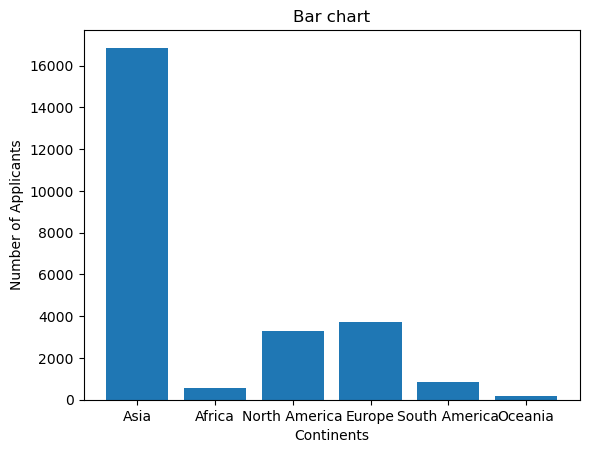

In [51]:
import matplotlib.pyplot as plt
plt.bar('Continents', #Cat column X-axis
        'Number of Applicants', #Num column: Height Y-axis
        data=continents_df)
plt.title("Bar chart") #title of graph
plt.xlabel('Continents') #X-axis name
plt.ylabel('Number of Applicants') #Y-axis
plt.savefig('Continents_bar_chart.jpg')
plt.show() #show will avoid the writeup and it should at last

In [9]:
cdf=visa_df['continent']
cdf
#raw data
#continents_df
# for loop
# value_counts
#plot the bar chart: matplotlib

0          Asia
1          Asia
2          Asia
3          Asia
4        Africa
          ...  
25475      Asia
25476      Asia
25477      Asia
25478      Asia
25479      Asia
Name: continent, Length: 25480, dtype: object

In [11]:
import matplotlib.pyplot as plt
plt.bar('Continents', #Cat column X-axis
        'Number of Applicants', #Num column: Height Y-axis
        data=continents_df)
plt.title("Bar chart") #title of graph
plt.xlabel(i) #X-axis name
plt.ylabel(j) #Y-axis
plt.savefig(f'i_bar_chart.jpg')
plt.show() #show will avoid the writeup and it should at last

NameError: name 'continents_df' is not defined

############################Task-1#################################
- take a fresh notebook
- read the visa dataset
- create a case_status frequency table
- save that in your laptop

- take another notebook
- perform the bar plot on case_status dataframe

############################Task-2#################################
- take a fresh notebook
- resad the visa dataset
- create a case_status frequency table
- perform the bar plot on case_status dataframe


**Bar chart using Seaborn**

- we can plot bar charts 
- one package is matplotlib
- another package is seaborn
- In matplotlib the method is **plt.bar**
- In seaborn the method is **countplot**
- In matplotlib 
    - we will take the raw data
    - we will create our frequency table i.e. dataframe
    - we will pass the column1,column2 and dataframe name
- In seaborn count plot
    - It takes raw data
    - we will provide direct column name
    - we will provide main dataframe name

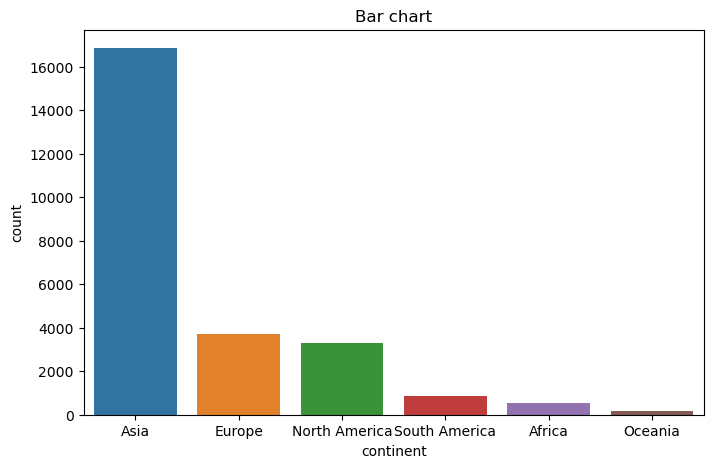

In [32]:
#Continent column====>continent_df===plt.bar
#continent column directly ==== visa_df
import seaborn as sns
plt.figure(figsize=(8,5)) #8 units x-axis, 5 units y-axis
order_continents=['Asia','Europe', 'North America', 'South America','Africa', 'Oceania']
sns.countplot(data=visa_df,x='continent',order=order_continents)
plt.title('Bar chart')
# plt.savefig('Continent_bar_chart_ucing_seaborn.jpg')
plt.show()

In [33]:
visa_df['continent'].value_counts().keys()

Index(['Asia', 'Europe', 'North America', 'South America', 'Africa',
       'Oceania'],
      dtype='object', name='continent')

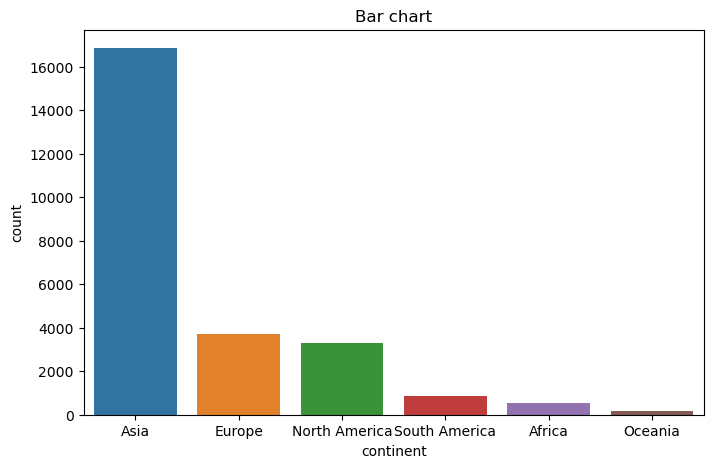

In [34]:
import seaborn as sns
plt.figure(figsize=(8,5)) #8 units x-axis, 5 units y-axis
order_continents=visa_df['continent'].value_counts().keys()
sns.countplot(data=visa_df,x='continent',order=order_continents)
plt.title('Bar chart')
# plt.savefig('Continent_bar_chart_ucing_seaborn.jpg')
plt.show()

$task-3$

**Using for loop plot bar charts of all cat columns**
- we can use seaborn and matplotlib
- seaborn: countplot requires only raw data, direct column name and main data
- matplotlib: requires frequency table
    - from raw data,we will make value counts
    - from value counts we are making keys and values
    - then we creating a dataframe
- start with seaborn 
    - then we reuire cat column names
    - and main dataframe
- start with matplotlib
    - we already created a folder in pur laptop:Value_Counts_df

In [40]:
cat_columns #remove the case_id

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [ ]:
#where you want to save
#graphs_seaborn folder

**How to create a folder**

In [13]:
import os
os.getcwd()

'C:\\Users\\lasya\\Documents\\NareshIT\\EDA'

In [14]:
os.mkdir()

TypeError: mkdir() missing required argument 'path' (pos 1)

**os.makedirs()**
- makedirs create a leaf directory
- means it will take the current working directory and creates one extra folder
- gere my python file in **EDA** folder
- now i want to create a new folder **graphs_seaborn**
- which is one step ahead of EDA folder: EDA\graphs_seaborn
- Pass the full path inside the makdirs
- C:\Users\lasya\Documents\NareshIT\EDA\graphs_seaborn

In [15]:
#step=1: 
root_directory=os.getcwd()
root_directory

#step-2:
new_folder='graphs_seaborn'

#step-3:
new_dir=os.path.join(root_directory,new_folder)
new_dir

#step-4:make a dir
os.makedirs(new_dir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\lasya\\Documents\\NareshIT\\EDA\\graphs_seaborn'

In [16]:
try:
    root_directory=os.getcwd()
    new_folder='graphs_seaborn'
    new_dir=os.path.join(root_directory,new_folder)
    os.makedirs(new_dir)
    
except Exception as e:
    print(e)

[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\lasya\\Documents\\NareshIT\\EDA\\graphs_seaborn'


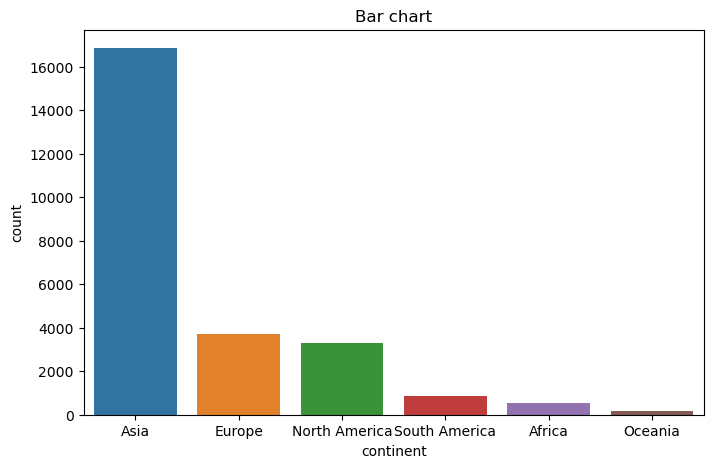

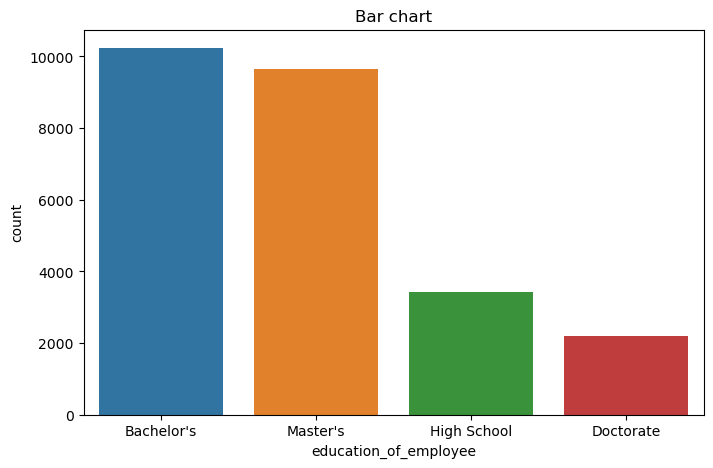

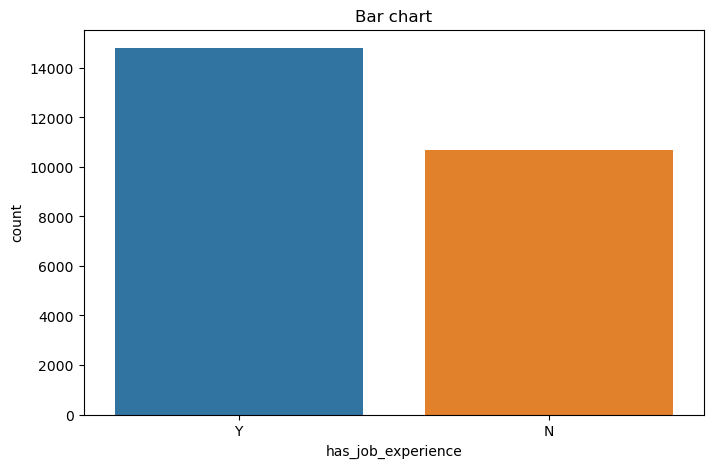

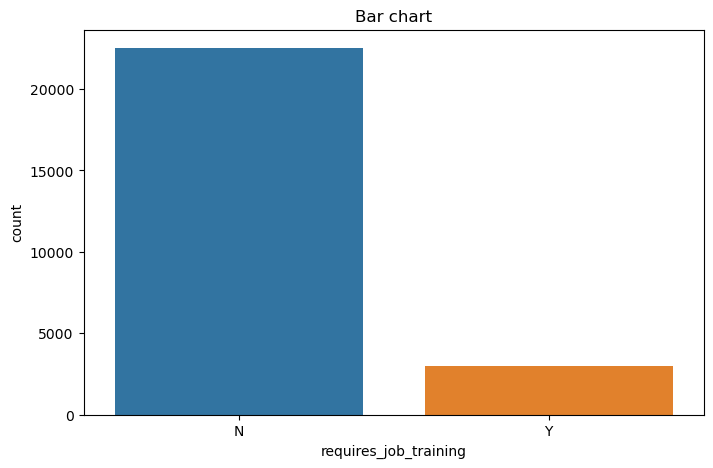

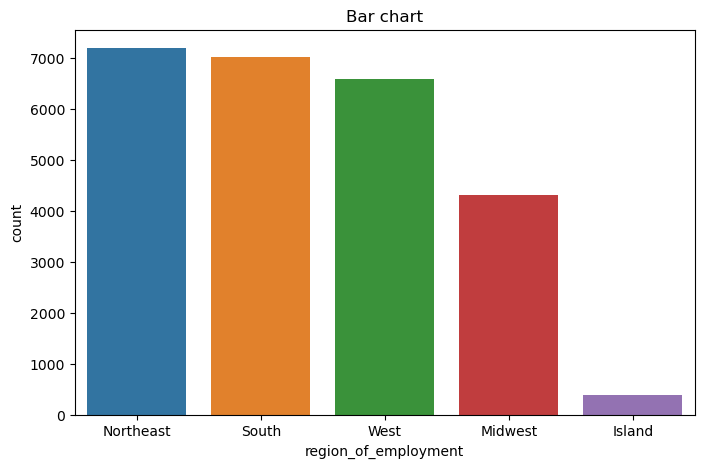

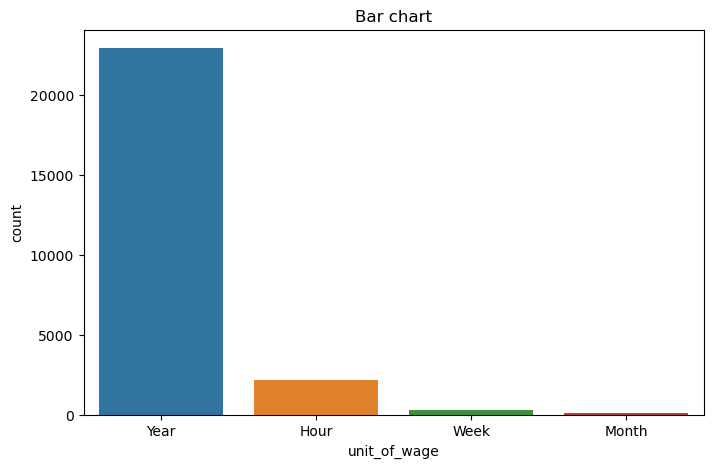

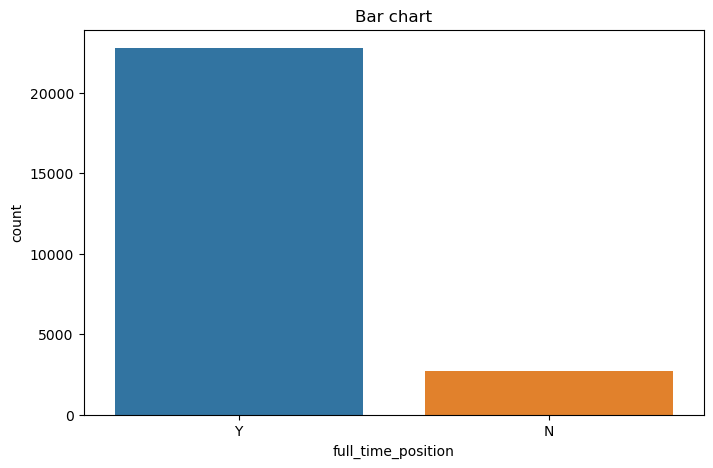

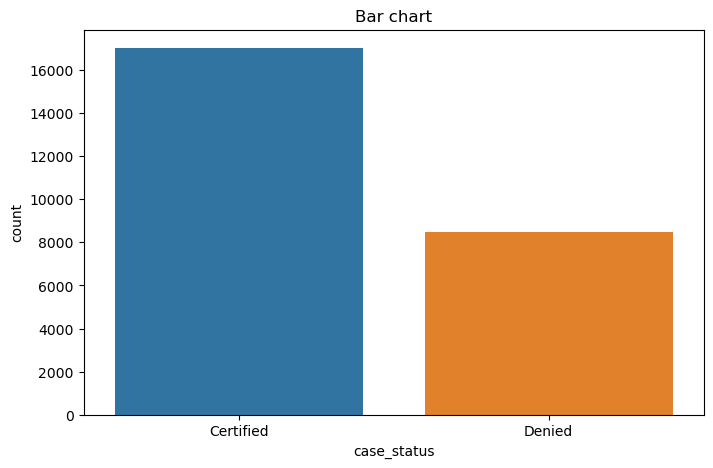

In [58]:
import seaborn as sns
for i in cat_columns[1:]:
    plt.figure(figsize=(8,5)) #8 units x-axis, 5 units y-axis
    order_continents=visa_df[i].value_counts().keys()
    sns.countplot(data=visa_df,x=i,order=order_continents)
    plt.title('Bar chart')
    plt.savefig(f'{new_dir}\\{i}_seaborn.jpg')
    plt.show()

In [17]:
#suppose if i save my file: graphs_seaborn
#file path
#C:\\             \\graphs_seaborn
f"{new_dir}'\\'{i}'\\'.jpg"

"C:\\Users\\lasya\\Documents\\NareshIT\\EDA\\graphs_seaborn'\\'case_status'\\'.jpg"

$task-4$

**using matplotlib**

In [6]:
import os
try:
    root_directory=os.getcwd()
    new_folder='graphs_matplotlib'
    new_dir=os.path.join(root_directory,new_folder)
    os.makedirs(new_dir)
except Exception as e:
    print(e)

[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\lasya\\Documents\\NareshIT\\EDA\\graphs_matplotlib'


In [7]:
root_directory=os.getcwd()
new_folder='Value_Counts_df'
dir=os.path.join(root_directory,new_folder)
dir

'C:\\Users\\lasya\\Documents\\NareshIT\\EDA\\Value_Counts_df'

In [8]:
dfs=os.listdir(dir)
dfs

['case_status.csv',
 'continent.csv',
 'education_of_employee.csv',
 'full_time_position.csv',
 'has_job_experience.csv',
 'region_of_employment.csv',
 'requires_job_training.csv',
 'unit_of_wage.csv']

**os_listdir**

In [29]:
dfs=os.listdir(r"C:\Users\lasya\Documents\NareshIT\EDA\Value_Counts_df")
dfs

['case_status.csv',
 'continent.csv',
 'education_of_employee.csv',
 'full_time_position.csv',
 'has_job_experience.csv',
 'region_of_employment.csv',
 'requires_job_training.csv',
 'unit_of_wage.csv']

In [11]:
import os
os.getcwd()

'C:\\Users\\lasya\\Documents\\NareshIT\\EDA'

In [ ]:
'C:\\Users\\lasya\\Documents\\NareshIT\\EDA'---------->python file
'C:\Users\lasya\Documents\NareshIT\EDA\Value_Counts_df'----->data file loc

In [12]:
pd.read_csv(f'{dir}\\full_time_position.csv')

,Labels,Count
0,Y,22773
1,N,2707


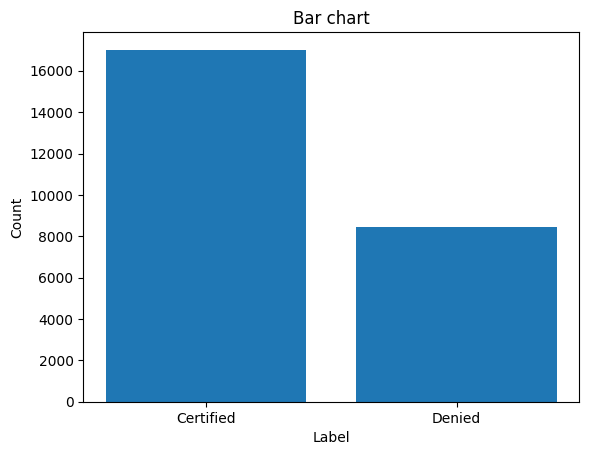

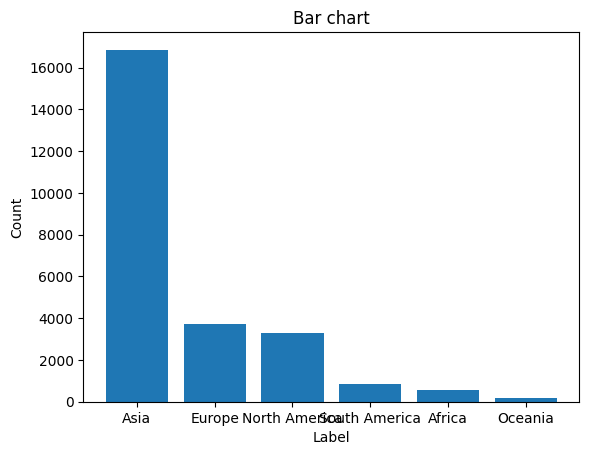

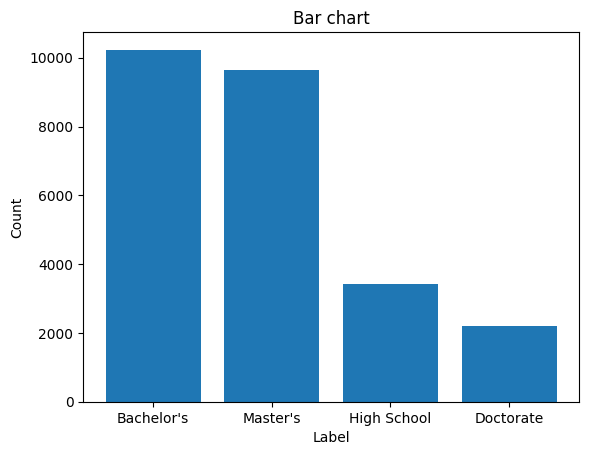

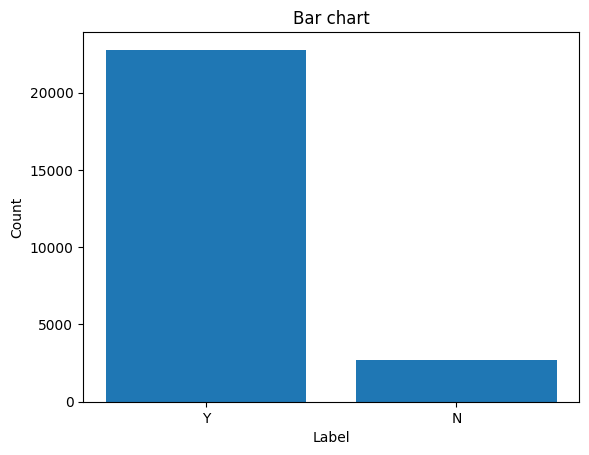

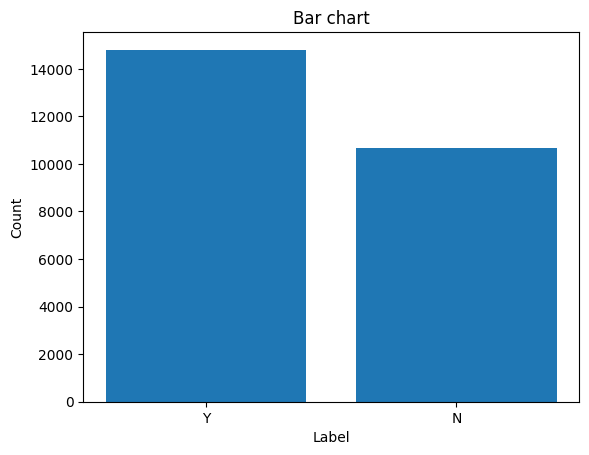

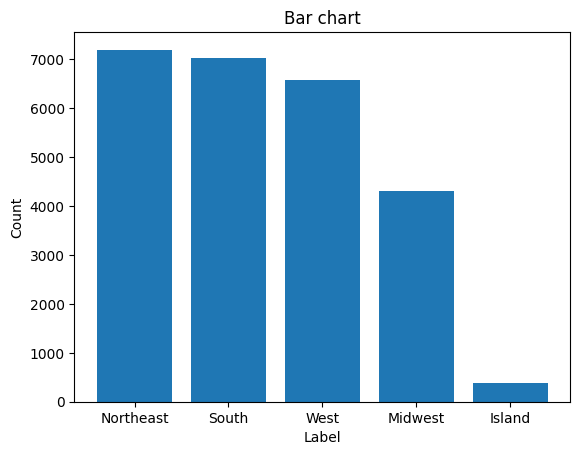

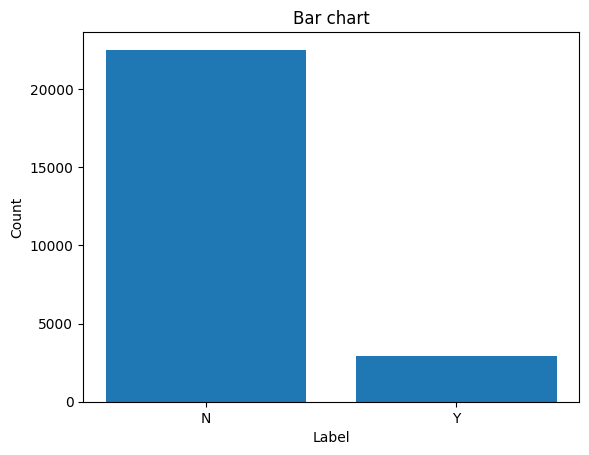

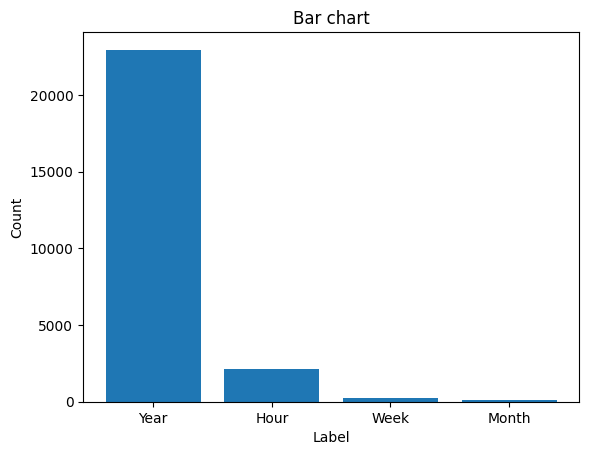

In [16]:
import matplotlib.pyplot as plt
for i in dfs:
    df=pd.read_csv(f'{dir}\\{i}') 
    plt.bar('Labels', #Cat column X-axis
            'Count', #Num column:Height Y-axis
            data=df)
    plt.title('Bar chart')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.savefig(f'{new_dir}\\{i}_matplotlib.jpg')
    plt.show()

<BarContainer object of 6 artists>

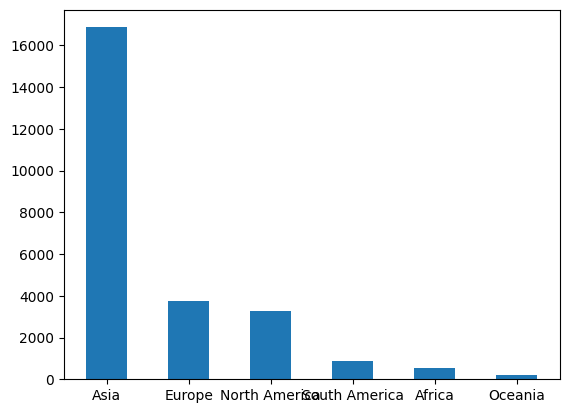

In [27]:
i='continent.csv'
path=dir+'\\'+i
df=pd.read_csv(path)
plt.bar('Labels', #Cat column X-axis
            'Count', #Num column:Height Y-axis
            width=0.5,data=df)

In [21]:
i='continent.csv'
dir+'\\'+i

'C:\\Users\\lasya\\Documents\\NareshIT\\EDA\\Value_Counts_df\\continent.csv'

**Subplots**

- if we have multiple plots when we apply for loop it is giving one by one
- it is hard to see all the graphs
- subplots is a kind of a matrix representation
- suppose we have a 2x2 matrix means 4 values,means 4 graphs we can plot
- first plot position rep with:(2,2,1) 
- second plot position rep with:(2,2,2)
- third plot position rep with:(2,2,3)
- fourth plot position rep with:(2,2,4)                        

<Axes: >

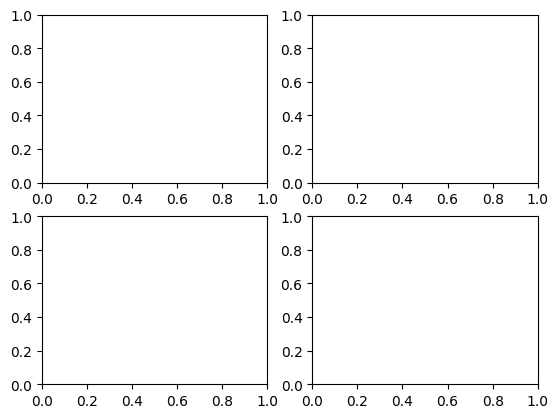

In [29]:
plt.subplot(2,2,1)
plt.subplot(2,2,2)
plt.subplot(2,2,3)
plt.subplot(2,2,4)
#2x2
#plt.subplot(2,2,i)

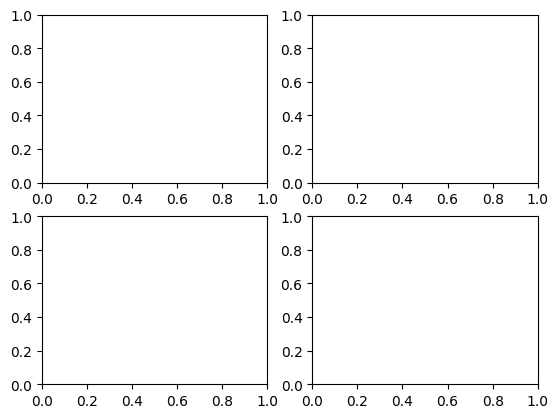

In [30]:
for i in range(1,5):
    plt.subplot(2,2,i)

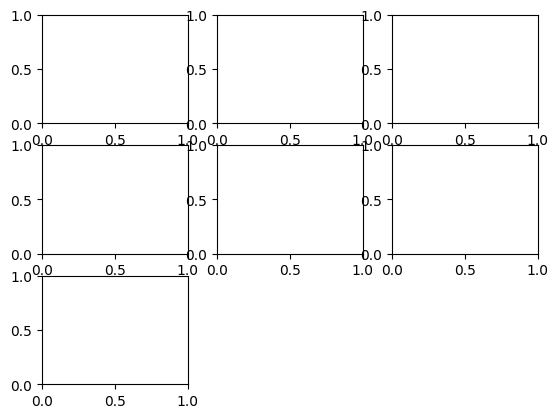

In [33]:
#3x3 matrix
for i in range(1,8):
    plt.subplot(3,3,i)

<Axes: >

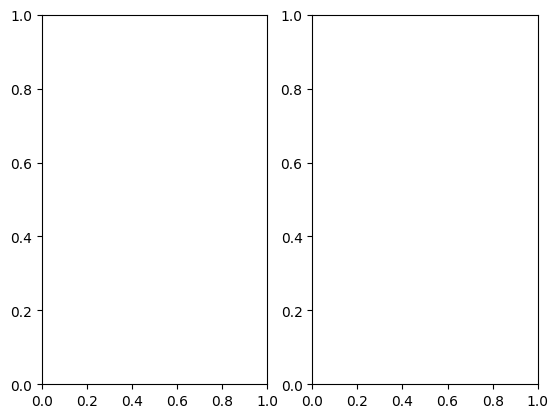

In [34]:
plt.subplot(1,2,1)
plt.subplot(1,2,2)

<Axes: >

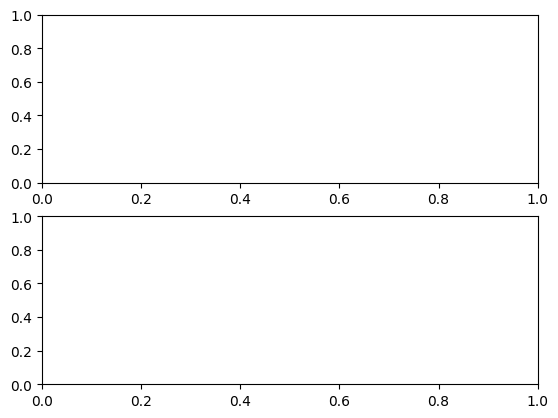

In [35]:
#2X1
plt.subplot(2,1,1)
plt.subplot(2,1,2)

In [36]:
#read the data again 
#take 3 columns
#1) continent 2)case status
#draw the seaborn individually

In [37]:
visa_df=pd.read_csv('Visadataset.csv')
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [38]:
visa_df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

**Task-1**

<Axes: xlabel='case_status', ylabel='count'>

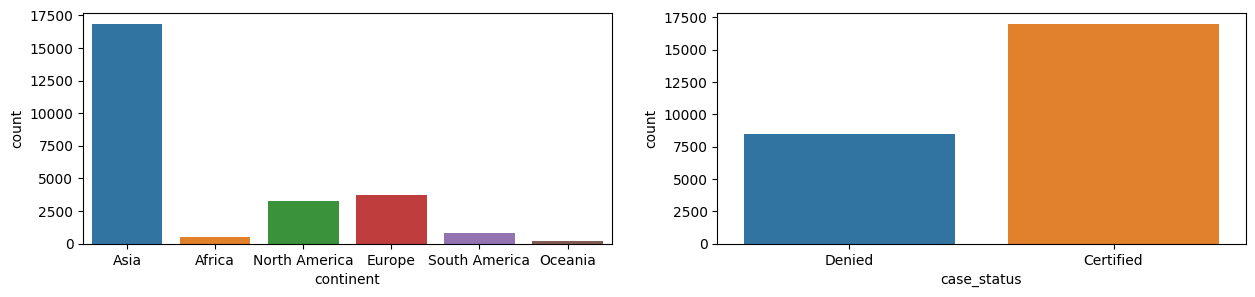

In [48]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.countplot(x='continent',data=visa_df)
#############################################################
plt.subplot(1,2,2)
sns.countplot(x='case_status',data=visa_df)

**Task-2**
- plot 4 plots
- continent,has_job_experience,requires_job_training,case_status

Text(0.5, 1.0, 'case_status_bar_chart')

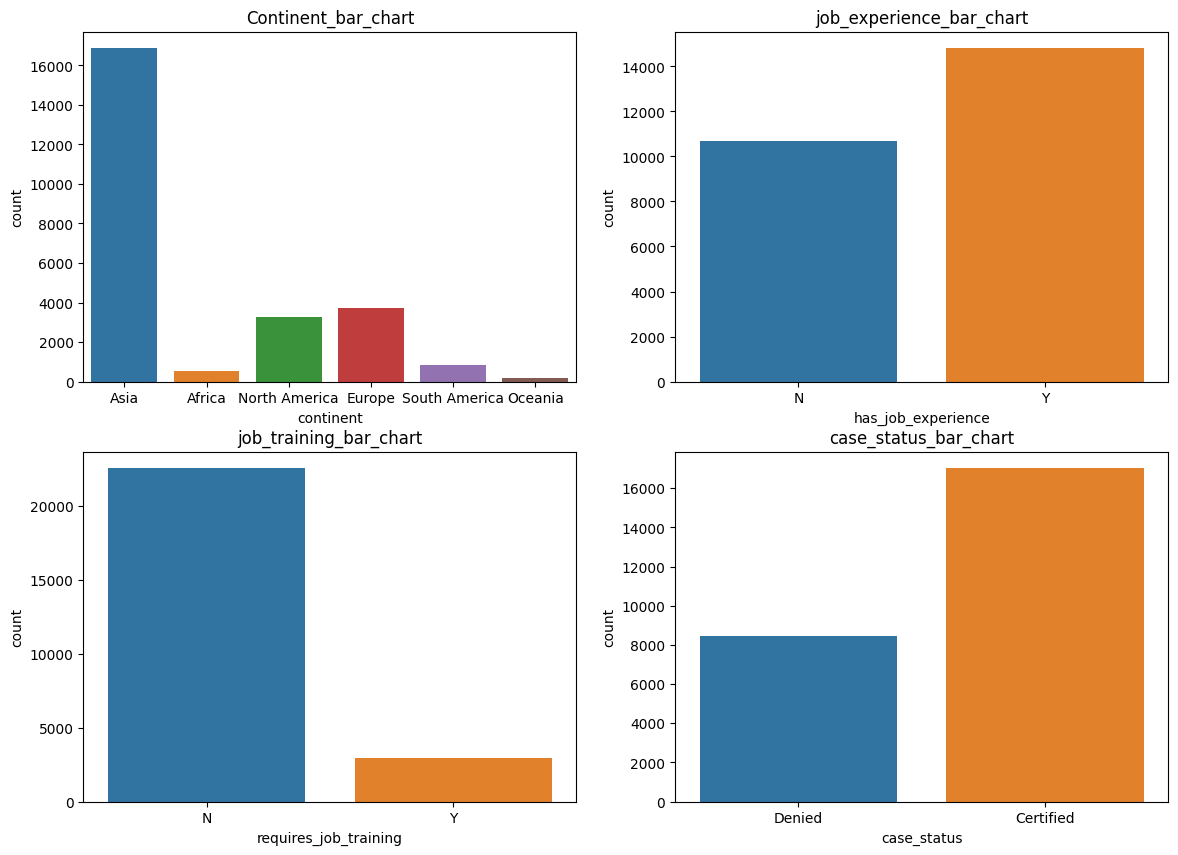

In [53]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.countplot(x='continent',data=visa_df)
plt.title('Continent_bar_chart')
#######################################################
plt.subplot(2,2,2)
sns.countplot(x='has_job_experience',data=visa_df)
plt.title('job_experience_bar_chart')
#################################################################
plt.subplot(2,2,3)
sns.countplot(x='requires_job_training',data=visa_df)
plt.title('job_training_bar_chart')
############################################################
plt.subplot(2,2,4)
sns.countplot(x='case_status',data=visa_df)
plt.title('case_status_bar_chart')

In [ ]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.countplot(x='continent',data=visa_df)

#######################################################
plt.subplot(2,2,2)
sns.countplot(x='has_job_experience',data=visa_df)

#################################################################
plt.subplot(2,2,3)
sns.countplot(x='requires_job_training',data=visa_df)

############################################################
plt.subplot(2,2,4)
sns.countplot(x='case_status',data=visa_df)


# plt.subplot(3,3,i)
# sns.countplot(x=col,data=visa_df)



**Task-3**
- take cat columns,slice from index 1,avoid case_id 
- so we have 8 plots, so grid is 3x3
- for loop shld iterate length of cat_columns[1:]


In [56]:
cat_columns=visa_df.select_dtypes(include='object').columns
cat_columns[1:]

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [ ]:
#subplots (3,3,0) or (3,3,1)
# for i in range, what is the start value of i=0

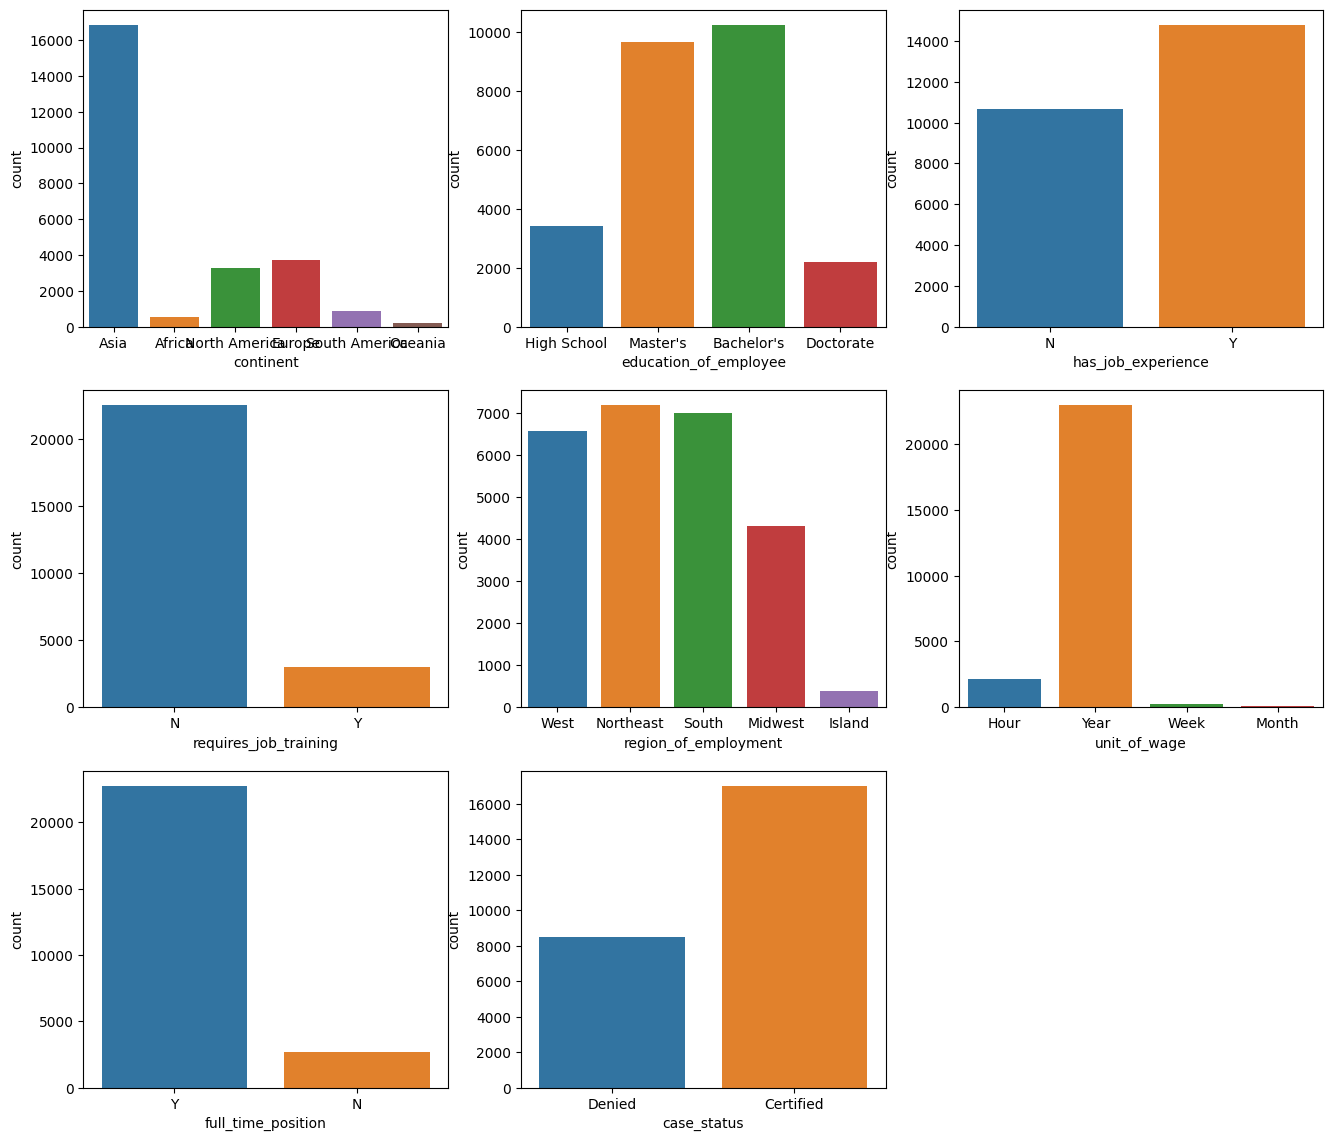

In [71]:
cols=cat_columns[1:]
plt.figure(figsize=(16,14))
for i in range(len(cols)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=cols[i],data=visa_df)

In [61]:
cols=cat_columns[1:]
for i in range(len(cols)):
    print(i+1)

1
2
3
4
5
6
7
8


**Method-3**

**Whenever open the file do below these two things**
- import the packages
- read the data
- make the categorical 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
visa_df=pd.read_csv('Visadataset.csv')
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [12]:
types=dict(visa_df.dtypes)
cat_list=[]
num_list=[]
for i,j in dict(visa_df.dtypes).items():
    if j=='object':
        cat_list.append(i)
    else:
        num_list.append(i)
cat_list,num_list

(['case_id',
  'continent',
  'education_of_employee',
  'has_job_experience',
  'requires_job_training',
  'region_of_employment',
  'unit_of_wage',
  'full_time_position',
  'case_status'],
 ['no_of_employees', 'yr_of_estab', 'prevailing_wage'])

In [ ]:
# apply the value counts for categorical columns
# continent
# save the value counts in a varaiable
# new_variable=variable name.plot(kind='bar')
# new_variable.bar_label(new_variable.containers[0])
# plt.show()

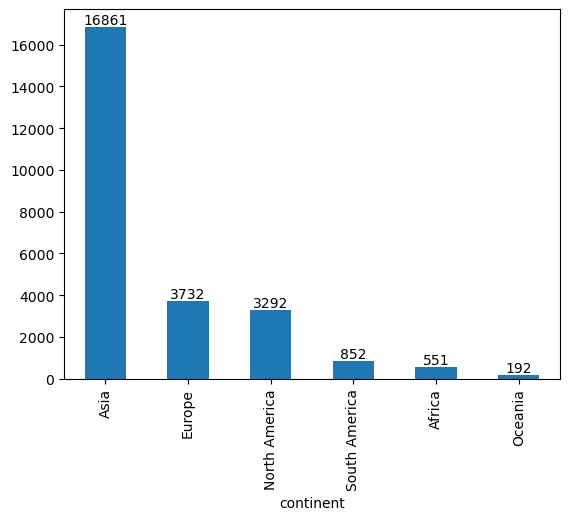

In [19]:
cds=visa_df['continent'].value_counts()
ax=cds.plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.show()

# Pie chart

- Pie chart is a 360 degrees view
- it is under matplotlib package
- it will take keys and values
- that we will get from value counts

In [ ]:
#step-1 : get keys from continent value counts
#step-2: get values from continent value counts
#step-3: plt.pie verify the arguments
#        which arguments takes values and keys

In [35]:
visa_df['continent'].value_counts(normalize=True)*100

continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64

In [37]:
visa_df['continent'].value_counts().keys()

Index(['Asia', 'Europe', 'North America', 'South America', 'Africa',
       'Oceania'],
      dtype='object', name='continent')

In [38]:
visa_df['continent'].value_counts().values

array([16861,  3732,  3292,   852,   551,   192], dtype=int64)

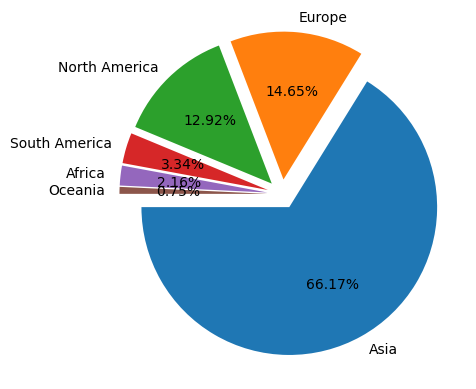

In [49]:
keys=visa_df['continent'].value_counts().keys()
values=visa_df['continent'].value_counts().values
plt.pie(values,
        explode=[0.1,0.1,0.1,0.1,0.1,0.1],
        labels=keys,autopct='%0.2f%%',
        radius=1,
        startangle=180) #f-float 0.2- decimal
plt.show()